# Lab 13 Template              

Proving that the SNe data is consistent with the BenchMark Cosmology.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.units as u
from astropy.constants import c

# Importing the solutions from Lab 12-14
from Lab12_Template import CosmologicalTools

In [2]:

# Define the benchmark cosmology at z =0
# Planck 2016 results. XIII. Cosmological parameters   
# Planck Collaboration+2016 A&A 594 13  Table 4, column 2 

OmegaM0_planck = 0.308   # Matter Density Parameter
OmegaR0_planck = 8.24e-5  # Radiation Density Parameter
OmegaL0_planck = 0.692  # Dark Energy Density Parameter
h_planck = 0.6781   # Hubble Constant  100 h km/s/Mpc


In [3]:
# Define the Einstein-DeSitter cosmology (Matter Dominated)
OmegaMD = 1
OmegaRD = 0
OmegaLD = 0
# h is the same = h_planck

In [4]:
BenchMark = CosmologicalTools(OmegaM0_planck,OmegaR0_planck,OmegaL0_planck,h_planck)
EinsteinDeSitter = CosmologicalTools(OmegaMD,OmegaRD,OmegaLD,h_planck)



In this exercise we will use data from the Supernova Cosmology project, one of the two teams which first found that the expansion rate of the Universe is accelerating in 1999. A simple introduction to the methods and findings of the SCP group can be found at https://newscenter.lbl.gov/2009/10/27/evolving-dark-energy/. The original paper is Perlmutter *et al.* 1999, "Measurement of $\Omega$ and $\Lambda$ from 42 High Redshift Supernovae", The Astrophysical Journal, Vol. 517, page 565.

The data set we will be using is a more recent sample, containing observations of 580 supernovae, known as the Union 2.1 sample from the paper Suzuki *et al*. 2012, "THE *HUBBLE SPACE TELESCOPE* CLUSTER SUPERNOVA SURVEY. V. IMPROVING THE DARK-ENERGY CONSTRAINTS ABOVE $z>1$ AND BUILDING AN EARLY-TYPE-HOSTED SUPERNOVA SAMPLE", The Astrophysical Journal, vol. 746, page 85.

The data are in the file SNeData.txt.

Take a look at the file using the `with` statement. 

One should always close files when finished using them.
The `with` statement makes this automatic; using it is a good habit to form.

Lets simply open the file and print out the first 10 lines to see how the file is formatted:

In [6]:
with open('SNeData.txt', 'r') as infile:
    for i in range(10):
        line = infile.readline()
        line = line.rstrip("\n")
        print(line)

# Supernova Cosmology Project Union2.1 Data
#  Suzuki et al. 
#Name z DistMod DistModErr ProbLowMassHost
1993ah 0.028488        35.3465833928 0.223905932998  0.128418942246
1993ag 0.050043        36.6823679154 0.166828851413  0.128418942246
1993o  0.052926        36.8176912545 0.1557559148    0.128418942246
1993b  0.070086        37.4467365424 0.158466934433  0.128418942246
1992bs 0.062668        37.4834093505 0.156099434739  0.128418942246
1992br 0.087589        38.2290570494 0.187745679272  0.128418942246
1992bp 0.078577        37.4881622607 0.155635656185  0.128418942246


The top of any good data file intended for sharing with others contains a "header" -- some lines at the top which describe the contents of the file.

Here we see that the file contains the SCP Union2.1 data, and that the columns are:

 * the name of the supernova
 * the redshift measured from its spectrum
 * its distance modulus
 * an estimate of the measurement error in the distance modulus
 * the probability the supernova occurred in a low-mass host galaxy
 
For this exercise, we won't care what a supernova's name is, and we won't get to the last column until the end of the exercise.

# Part A

The difference between the absolute magnitude $M$ and the apparent magnitude $m$, a number called the *distance modulus* which depends only upon the distance to the source

$$
\begin{split}
m-M &= - 2.5 \log_{10} \left(\frac{1}{F_0}\frac{L}{4\pi d^2}\right) + 2.5 \log_{10}\left(\frac{1}{F_0}\frac{L}{4\pi(10\ \textrm{pc})^2}\right)  \\
&= 5 \log_{10}\left(\frac{d}{10\ \textrm{pc}}\right)
\end{split}
$$
Because $M$ and $m$ are logarithmic functions, their difference is proportional to the *ratio* of the distance $d$ to 10 pc.

This is the distance measurement given in the data file for the distance to the supernovae. The measured LUMINOSITY distance is then

$$ d_L = 10^{(m-M)/5 +1} \textrm{pc} $$

In [15]:
def Distance_fromMod(mod):
    """ Function to compute the distance using the distance modulus
    PARAMETERS
    ----------
    mod: `float`
        distance modulus (apparent magnitude - absolute magnitude)

    OUTPUTS
    -------
    DL: `float`
        luminiosity distance in Mpc
    """

    ## FILL THIS IN
    exp = mod/5 + 1
    lumdist = (10**exp *u.pc).to(u.Mpc)
    return lumdist

In [11]:

# Read in the file "SNeData.txt" using `npgenfromtxt`
data = np.genfromtxt("SNeData.txt", names=True, skip_header=2)


Text(0, 0.5, 'm-M')

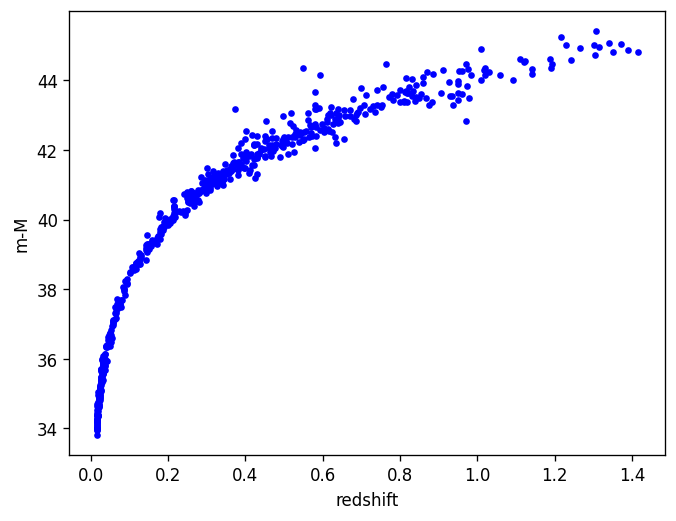

In [16]:
# Create a plot of Distance Modulus Vs. Redshift

plt.rcParams["figure.dpi"] = 120


plt.plot(data['z'] , data["DistMod"], 'b.')
plt.xlabel('redshift')
plt.ylabel('m-M')


# Part B

Now let's form an actual distance in mega-parsecs (Mpc) from the distance modulus and a velocity in km/second from the redshifts

In [17]:
# 1) Distance
LD = Distance_fromMod(data["DistMod"])
print(LD[0])

117.30504178865594 Mpc


In [18]:
# 2) velocity 
VR = data['z']*c.to(u.km/u.s)
print(VR[0])

8540.487543504 km / s


# Part C
plot distance versus velocity just for the "nearby" supernovae, those within 200 Mpc of Earth. We can select the set of indices of the nearby supernovae using the `numpy.where` function

In [41]:
# Create an index for the nearby supernovae
near = np.where(LD.value < 200)[0]

In [42]:
# get the number of nearby supernovae
print(len(near))

135


Text(0.5, 1.0, '135 nearest supernovae within 200 Mpc')

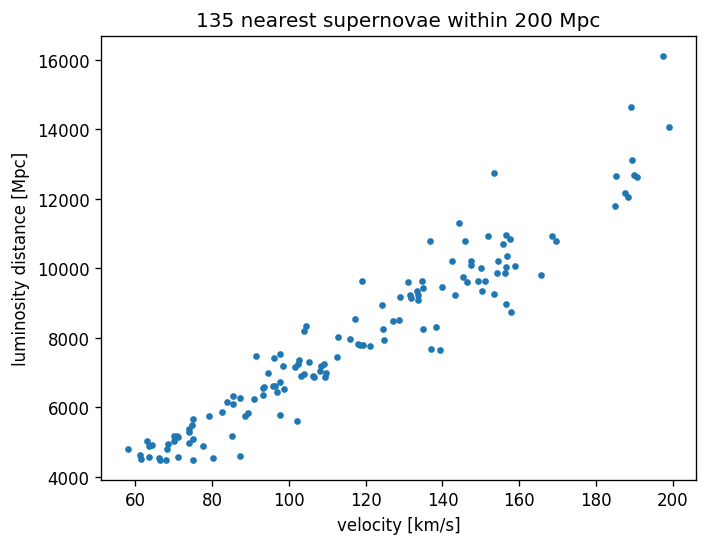

In [43]:
# Plot the Luminosity Distance vs. Recessional Speed for all nearby Supernovae

plt.rcParams["figure.dpi"] = 120

# Fill this in 
plt.plot(LD[near], VR[near] ,'.')

plt.xlabel('velocity [km/s]')
plt.ylabel('luminosity distance [Mpc]')

# Fill this in :   Add a relevant title
plt.title(f"{len(near)} nearest supernovae within 200 Mpc")

# Part D

Plot a linear relationship atop the data

In [44]:
# Create a linear model
# V = H*R --> R = V/ H 

# 1/Ho ~ Age of the universe 
# this line is equivalently = t_age * VR[near] --> constant expansion over time.

modelLD = VR/BenchMark.Ho

Text(0.5, 1.0, '135 nearest supernovae within 200 Mpc')

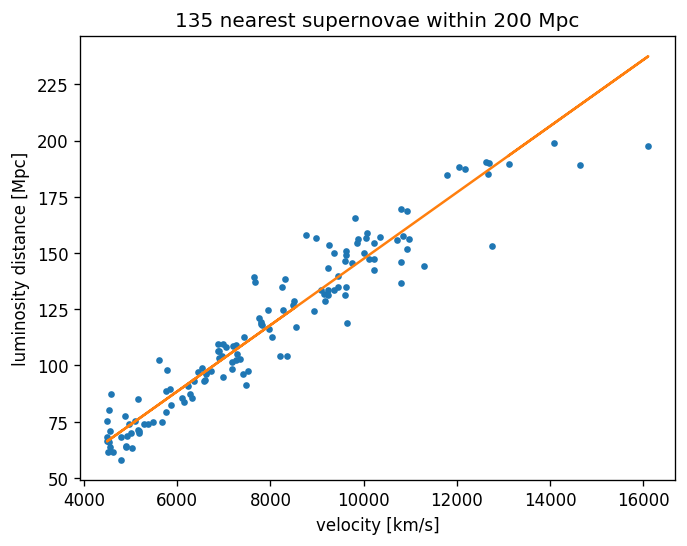

In [53]:
# Recreate the plot, now including the linear model
# FILL THIS IN 
plt.rcParams["figure.dpi"] = 120

# Fill this in 
plt.plot(VR[near], LD[near], '.')
plt.plot(VR[near], modelLD[near])

plt.xlabel('velocity [km/s]')
plt.ylabel('luminosity distance [Mpc]')

# Fill this in :   Add a relevant title
plt.title(f"{len(near)} nearest supernovae within 200 Mpc")


# Part E

Let's now try plotting the whole dataset, which extends to distances far beyond what Hubble could have measured in his day

Text(0.5, 1.0, 'All Supernovae!')

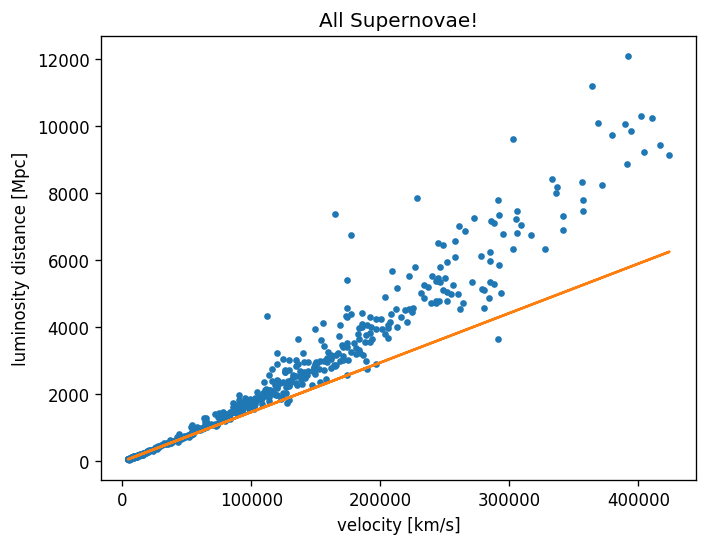

In [51]:
# Plot the whole data set. Not just the nearby Sne. 
# FILL THIS IN 
plt.rcParams["figure.dpi"] = 120

# Fill this in 
plt.plot(VR, LD ,'.')
plt.plot(VR, modelLD)
plt.xlabel('velocity [km/s]')
plt.ylabel('luminosity distance [Mpc]')

# Fill this in :   Add a relevant title
plt.title(f"All Supernovae!")



# Part F

Instead of assuming a linear model, let's use our code to compute a model for the luminosity distance to objects moving with the Hubble flow. 


In [47]:
# define a vector of redshifts to compute the luminosity distance
zvec = np.linspace(0.01, 1.1*max(data["z"]), 100)

In [48]:
## Compute the corresponding recessional velocities
VR_vec = (zvec*c).to(u.km/u.s)

In [49]:
## Compute the Luminosity Distance at each redshift  in the BenchMark and Einstein-DeSitter Universes.
model_benchmark = [BenchMark.LuminosityDistance(i).value for i in zvec]
model_EDS = [EinsteinDeSitter.LuminosityDistance(i).value for i in zvec]

Text(0.5, 1.0, 'All Supernovae!')

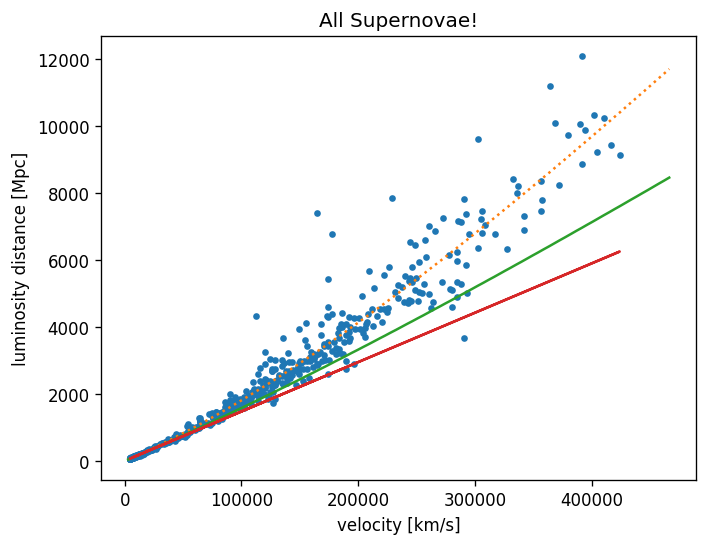

In [58]:
## Plot the New models on top of the data. 
## FILL THIS IN
plt.rcParams["figure.dpi"] = 120

# Fill this in 
plt.plot(VR, LD, '.')
plt.plot(VR_vec, model_benchmark, ls="dotted")
plt.plot(VR_vec, model_EDS, ls="-")
plt.plot(VR, modelLD)

plt.xlabel('velocity [km/s]')
plt.ylabel('luminosity distance [Mpc]')

# Fill this in :   Add a relevant title
plt.title(f"All Supernovae!")



# Part G
We can characterize how well the model fits the data by computing the  "$\chi^2$" of the model with respect to the data

$$ \chi = \sqrt{ \frac{\sum_i (\textrm{model}(z_i) - r_i)}{N-1} } $$

Let's write a function to do this:

In [ ]:
def chi(model, data):
    """ Function to compute the deviation between a model and data 
            Chi = sqrt (Sum (deviation between model and data) / N-1)
    
    PARAMETERS
    ---------
    model: `np.darray`
        Array containing the model to be compared to the data
        
    data: `np.array`
        Array containing the data to be compared to the model
    
    OUTPUTS
    -------
    Chi: `float`
        Describes how well the model fits the data 
    
    """

    return 

The $\chi$ of our linear model is then

The $\chi$ of our Einstein-DeSitter Luminosity Distance model is then

The $\chi$ of our BenchMark model is then

To test this more rigorously we could run through different values of Omega_M and Omega_L and generate probability contours (rather than $\chi$)

![title](scp2.1.png)